### **Project Development Phase**
###                **Sprint 3** 
### **Team ID: PNT2022TMID35710**
### **Project Name: Intelligent Vehicle Damage Assessment and Cost Estimator for Insurance Companies**

# **Image Pre Processing**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.1, 
                                   zoom_range=0.1, 
                                   horizontal_flip=True)

In [ ]:
val_datagen = ImageDataGenerator(rescale = 1./255)

## **For Body**

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Car damage/body/training',
                                                 target_size=(224,224), 
                                                 batch_size=10, 
                                                 class_mode='categorical')

test_set = val_datagen.flow_from_directory('/content/drive/MyDrive/Car damage/body/validation',
                                           target_size =(224,224), 
                                           batch_size=10, 
                                           class_mode='categorical')

Found 979 images belonging to 3 classes.
Found 171 images belonging to 3 classes.


# **For the level of Damage:**



In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Car damage/level/training',
                                                 target_size=(224,224), 
                                                 batch_size=10, 
                                                 class_mode='categorical')

test_set = val_datagen.flow_from_directory('/content/drive/MyDrive/Car damage/level/validation', 
                                           target_size=(224,224), 
                                           batch_size=10, 
                                           class_mode='categorical')

Found 979 images belonging to 3 classes.
Found 171 images belonging to 3 classes.


# Model Building for Body

# **1.Importing the Model Building Libraries**

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


# Loading the Model

In [ ]:
Image_Size = [224,224,3]
train_path = '/content/drive/MyDrive/Car damage/level/training'
valid_path = '/content/drive/MyDrive/Car damage/level/validation'

In [ ]:
vgg16 = VGG16(input_shape=Image_Size, weights='imagenet', include_top=False) 

58889256/58889256 [==============================] - 2s 0us/step


# **Adding Flatten Layer**

In [ ]:
for layer in vgg16.layers: 
  layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/Car damage/body/training/*')

In [ ]:
folders

['/content/drive/MyDrive/Car damage/body/training/02-side',
 '/content/drive/MyDrive/Car damage/body/training/00-front',
 '/content/drive/MyDrive/Car damage/body/training/01-rear']

In [ ]:
x = Flatten()(vgg16.output)

In [ ]:
len(folders)

3

# **Adding Output Layer**

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

## **Creating a Model Object**

In [ ]:
model = Model(inputs=vgg16.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

# **Configure the Learning Process**

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# **Train the Model**

In [ ]:
r = model.fit_generator(
    training_set,
    validation_data = test_set, epochs=50, steps_per_epoch = len(training_set), validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/50
98/98 [==============================] - 419s 4s/step - loss: 1.3121 - accuracy: 0.5271 - val_loss: 1.1790 - val_accuracy: 0.5789
Epoch 2/50
98/98 [==============================] - 15s 150ms/step - loss: 0.8225 - accuracy: 0.6895 - val_loss: 1.1433 - val_accuracy: 0.5906
Epoch 3/50
98/98 [==============================] - 15s 151ms/step - loss: 0.5086 - accuracy: 0.7998 - val_loss: 0.9399 - val_accuracy: 0.6491
Epoch 4/50
98/98 [==============================] - 15s 149ms/step - loss: 0.3860 - accuracy: 0.8519 - val_loss: 1.0874 - val_accuracy: 0.6199
Epoch 5/50
98/98 [==============================] - 15s 149ms/step - loss: 0.3766 - accuracy: 0.8580 - val_loss: 1.1203 - val_accuracy: 0.6257
Epoch 6/50
98/98 [==============================] - 15s 149ms/step - loss: 0.3042 - accuracy: 0.8825 - val_loss: 1.1767 - val_accuracy: 0.6374
Epoch 7/50
98/98 [==============================] - 15s 148ms/step - loss: 0.1810 - accuracy: 0.9346 - val_loss: 1.3075 - val_accuracy: 0.6257
E

# **Save the Model**

In [ ]:
from tensorflow.keras.models import load_model 
model.save('/content/drive/MyDrive/Vehicle damage/body.h5')

# **Test the model**

In [ ]:
from tensorflow.keras.models import load_model
import cv2
from skimage.transform import resize


In [ ]:
model = load_model('/content/drive/MyDrive/Vehicle damage/body.h5')

In [ ]:
def detect (frame):
  img=cv2. resize (frame, (224, 224) )
  img = cv2. cvtColor (img, cv2. COLOR_BGR2RGB)
  if (np.max (img) >1):
    img = img/255.0
  img = np.array([img])
  prediction = model .predict (img)
  label = ["front", "rear", "side"]
  preds = label[np.argmax(prediction)]
  return preds


In [ ]:
import numpy as np

In [ ]:
data = '/content/drive/MyDrive/Car damage/body/training/01-rear/0008.JPEG'
image= cv2.imread(data)
print(detect(image))

1/1 [==============================] - 0s 141ms/step
rear


# **For Level Damage**

**Import the ImageDataGenerator Library**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# **Model Building**

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

# **Loading the Model**

In [ ]:
Image_Size = [224,224,3]

train_path='/content/drive/MyDrive/Car damage/level/training'
valid_path='/content/drive/MyDrive/Car damage/level/validation'

In [ ]:
vgg16 = VGG16(input_shape=Image_Size, weights='imagenet', include_top=False) 

# **Adding Flatten Layer**

In [ ]:
for layer in vgg16.layers: 
  layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/Car damage/level/training/*')

In [ ]:
folders

['/content/drive/MyDrive/Car damage/level/training/02-moderate',
 '/content/drive/MyDrive/Car damage/level/training/03-severe',
 '/content/drive/MyDrive/Car damage/level/training/01-minor']

In [ ]:
x = Flatten() (vgg16.output)

In [ ]:
len(folders)

3

# **Adding Output Layers**

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# **Creating a model Object**

In [ ]:
model = Model(inputs=vgg16.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

# **Configure the learining Process**

In [ ]:
model.compile(
loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy']
)

# **Train the Model**

In [ ]:
r = model.fit_generator(
    training_set,
    validation_data = test_set, epochs=50, steps_per_epoch = len(training_set), validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/50
98/98 [==============================] - 16s 154ms/step - loss: 1.1733 - accuracy: 0.5444 - val_loss: 1.2454 - val_accuracy: 0.5614
Epoch 2/50
98/98 [==============================] - 15s 151ms/step - loss: 0.6501 - accuracy: 0.7344 - val_loss: 1.0317 - val_accuracy: 0.6374
Epoch 3/50
98/98 [==============================] - 15s 149ms/step - loss: 0.5561 - accuracy: 0.7732 - val_loss: 1.4555 - val_accuracy: 0.5146
Epoch 4/50
98/98 [==============================] - 15s 150ms/step - loss: 0.4579 - accuracy: 0.8335 - val_loss: 1.0076 - val_accuracy: 0.6199
Epoch 5/50
98/98 [==============================] - 15s 149ms/step - loss: 0.3093 - accuracy: 0.8805 - val_loss: 1.8570 - val_accuracy: 0.5029
Epoch 6/50
98/98 [==============================] - 15s 148ms/step - loss: 0.3069 - accuracy: 0.8856 - val_loss: 1.1092 - val_accuracy: 0.6608
Epoch 7/50
98/98 [==============================] - 15s 149ms/step - loss: 0.1748 - accuracy: 0.9367 - val_loss: 1.2303 - val_accuracy: 0.6082

# **Save the Model**

In [ ]:
from tensorflow.keras.models import load_model 
model.save('/content/drive/MyDrive/Vehicle damage/level.h5')

Test the Model

In [ ]:
from tensorflow.keras.models import load_model
import cv2
from skimage.transform import resize


In [ ]:
model = load_model('/content/drive/MyDrive/Vehicle damage/level.h5')

In [ ]:
def detect(frame):
  img = cv2.resize (frame, (224,224))
  img = cv2.cvtColor (img, cv2.COLOR_BGR2RGB)

  if (np.max(img)>1):
    img = img/255.0
  img = np.array([img])
  prediction = model.predict (img)
  label = ["minor", "moderate", "severe"]
  preds = label[np.argmax (prediction) ]
  return preds


In [ ]:
import numpy as np
import PIL
from IPython import display

def cv2_imshow(a):
    a = a.clip(0, 255).astype('uint8')
    if a.ndim == 3:
        if a.shape[2] == 4:
            a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
        else:
            a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    display.display(PIL.Image.fromarray(a))

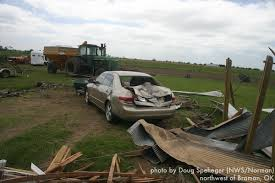

1/1 [==============================] - 0s 123ms/step
severe


In [ ]:
data = '/content/drive/MyDrive/Car damage/level/validation/03-severe/0004.JPEG'
image = cv2.imread(data)
cv2_imshow(image)
print(detect(image))